In [2]:
import numpy as np
import pandas as pd
import requests
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Data

In [3]:
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/3c7b08f0-b388-44f4-a42c-7b0123bb6ea7.txt', timeout=2.5)
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/bdf4debd-8127-400a-bed5-28869d6449e4.txt', timeout=2.5)
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/2ad78366-a1ee-490b-a34f-4de0f8b6b5c7.txt', timeout=2.5)
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/64de946f-a315-4593-b49a-1e15046ab363.txt', timeout=2.5) # 张博
url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/e0f59dae-73ba-4175-818f-38534269e35b.txt', timeout=2.5) # 难度3
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/4/9b3f315b-9e71-4339-9833-865cfc4b4921.txt', timeout=2.5) # 难度3
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/3/0fd1264d-9ba3-4b1b-bb93-d9c27c8dfb92.txt', timeout=2.5) # sit
# url_data = requests.get('https://cos.drbrain.net/profile/tj/2023/1/3/81afc2e3-706f-4212-bbfd-e9e09d987f4a.txt', timeout=2.5) # stand
url_data.text

'timestamp,difficulty,pos_x,pos_y,pos_z,angle_yaw,angle_pitch,angle_roll\n1672803729256,3,-0.391,0.450,0.002,0.30,354.33,0.10\n1672803729367,3,-0.386,0.487,0.008,0.28,354.32,0.10\n1672803729464,3,-0.385,0.515,-0.012,0.32,354.35,0.09\n1672803729562,3,-0.391,0.548,-0.059,0.35,354.43,0.12\n1672803729659,3,-0.401,0.569,-0.080,0.35,354.44,0.16\n1672803729757,3,-0.462,0.556,-0.052,0.16,354.38,0.34\n1672803729854,3,-0.617,0.519,0.022,359.48,354.14,0.67\n1672803729965,3,-1.301,0.431,0.122,356.41,353.84,0.78\n1672803730063,3,-2.349,0.276,0.153,351.72,353.60,1.17\n1672803730160,3,-3.872,-0.069,0.204,344.31,353.09,2.57\n1672803730258,3,-5.504,-0.552,0.172,336.80,353.14,4.22\n1672803730356,3,-7.093,-1.169,0.094,329.89,353.56,5.92\n1672803730466,3,-8.469,-1.864,-0.034,323.58,354.49,7.12\n1672803730564,3,-9.027,-2.123,-0.113,321.75,355.26,7.34\n1672803730661,3,-9.204,-2.160,-0.140,322.24,355.25,7.30\n1672803730759,3,-9.154,-2.033,-0.182,323.40,355.46,6.91\n1672803730857,3,-9.057,-1.922,-0.210,324.45

In [4]:
def text2Df(myStr):
    lines=myStr.split('\n')
    head=lines[0].split(',')
    arr = [x.split(',') for x in lines[1:] if not not x ]
    df = pd.DataFrame(arr,columns = head)
    df['timestamp'] = df['timestamp'].astype('uint64', errors='ignore')
    df['timestamp'] = df['timestamp'] - df['timestamp'][0]
    df['difficulty'] = df['difficulty'].astype(int, errors='ignore')
    df['pos_x'] = df['pos_x'].astype(float, errors='ignore')
    df['pos_y'] = df['pos_y'].astype(float, errors='ignore')
    df['pos_z'] = df['pos_z'].astype(float, errors='ignore')
    df['angle_yaw'] = df['angle_yaw'].astype(float, errors='ignore')
    df['angle_pitch'] = df['angle_pitch'].astype(float, errors='ignore')
    df['angle_roll'] = df['angle_roll'].astype(float, errors='ignore')
    return df

In [5]:
head_data = text2Df(url_data.text)
# head_data.describe()
# head_data
def angle_adj(ang):
    if ang > 270:
        return ang - 360
    else:
        return ang
head_data['angle_yaw'] = head_data['angle_yaw'].apply(angle_adj)
head_data['angle_pitch'] = head_data['angle_pitch'].apply(angle_adj)
head_data['angle_roll'] = head_data['angle_roll'].apply(angle_adj)
head_data.describe()
# head_data['angle_yaw'].apply(angle_adj)

,timestamp,difficulty,pos_x,pos_y,pos_z,angle_yaw,angle_pitch,angle_roll
count,642.00000,642.0,642.000000,642.00000,642.000000,642.000000,642.000000,642.000000
mean,32055.67134,3.0,-0.653475,-0.90762,-1.853544,0.408302,-0.070576,-0.605826
std,18547.67804,0.0,3.714240,3.76658,3.894647,12.086137,18.140204,7.228311
min,0.00000,3.0,-11.681000,-20.51100,-14.226000,-39.790000,-64.230000,-24.930000
25%,16034.25000,3.0,-1.546750,-2.03125,-2.611250,-1.035000,-4.587500,-1.202500
50%,32055.00000,3.0,-0.870000,-0.35800,-1.449000,0.255000,0.225000,0.120000
75%,48076.25000,3.0,-0.078000,1.09800,-0.405000,2.405000,4.970000,1.377500
max,64112.00000,3.0,10.901000,5.95800,7.236000,38.490000,46.340000,23.990000


In [131]:
def compute_angle(data, mode:str):
    if mode == 'yaw':
        ang = np.arctan(data['pos_x'] / data['pos_z']) / math.pi * 180
    elif mode == 'pitch':
        ang = np.arctan(data['pos_z'] / data['pos_y']) / math.pi * 180
    elif mode == 'roll':
        ang = np.arctan(data['pos_y'] / data['pos_x']) / math.pi * 180
    return ang

head_data['pos_angle_yaw'] = head_data.apply(lambda row: compute_angle(row, 'yaw'), axis = 1)
head_data['pos_angle_pitch'] = head_data.apply(lambda row: compute_angle(row, 'pitch'), axis = 1)
head_data['pos_angle_roll'] = head_data.apply(lambda row: compute_angle(row, 'roll'), axis = 1)
head_data.describe()

,timestamp,difficulty,pos_x,pos_y,pos_z,angle_yaw,angle_pitch,angle_roll,pos_angle_yaw,pos_angle_pitch,pos_angle_roll
count,642.00000,642.0,642.000000,642.00000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,32055.67134,3.0,-0.653475,-0.90762,-1.853544,0.408302,-0.070576,-0.605826,11.748070,-12.644438,3.227278
std,18547.67804,0.0,3.714240,3.76658,3.894647,12.086137,18.140204,7.228311,47.748635,52.843653,54.154380
min,0.00000,3.0,-11.681000,-20.51100,-14.226000,-39.790000,-64.230000,-24.930000,-89.706930,-89.951913,-89.920935
25%,16034.25000,3.0,-1.546750,-2.03125,-2.611250,-1.035000,-4.587500,-1.202500,-12.224553,-61.023124,-46.167199
50%,32055.00000,3.0,-0.870000,-0.35800,-1.449000,0.255000,0.225000,0.120000,12.635892,-22.705476,-0.207407
75%,48076.25000,3.0,-0.078000,1.09800,-0.405000,2.405000,4.970000,1.377500,50.512763,35.160560,53.468298
max,64112.00000,3.0,10.901000,5.95800,7.236000,38.490000,46.340000,23.990000,89.913581,89.411029,89.831896


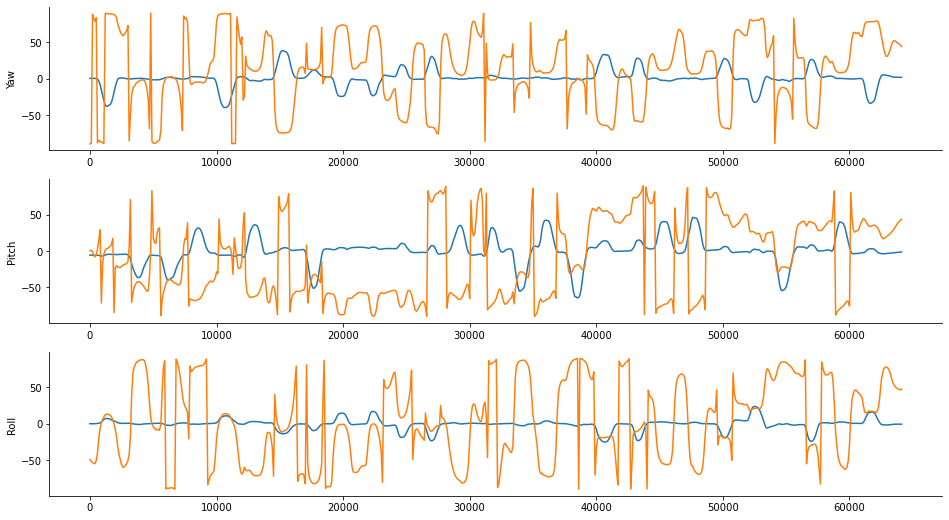

In [132]:
with plt.rc_context({'figure.figsize': (16,9), 'axes.spines.right':False, 'axes.spines.top':False}):
    plt.subplot(311)
    plt.plot(head_data['timestamp'], head_data['angle_yaw'])
    plt.plot(head_data['timestamp'], head_data['pos_angle_yaw'])
    plt.ylabel('Yaw')
    plt.subplot(312)
    plt.plot(head_data['timestamp'], head_data['angle_pitch'])
    plt.plot(head_data['timestamp'], head_data['pos_angle_pitch'])
    plt.ylabel('Pitch')
    plt.subplot(313)
    plt.plot(head_data['timestamp'], head_data['angle_roll'])
    plt.plot(head_data['timestamp'], head_data['pos_angle_roll'])
    plt.ylabel('Roll')

In [90]:
head_data.loc['26000':'28000', :]

,timestamp,difficulty,pos_x,pos_y,pos_z,angle_yaw,angle_pitch,angle_roll,pos_angle_yaw,pos_angle_pitch,pos_angle_roll
261,26103,3,-1.095,0.299,-0.978,-0.84,-1.91,0.50,48.230343,-73.000247,-15.272827
262,26200,3,-1.102,0.360,-1.014,-0.94,-1.83,0.46,47.381439,-70.453632,-18.091116
263,26299,3,-1.081,0.388,-1.014,-0.94,-1.84,0.49,46.831747,-69.061000,-19.744429
264,26409,3,-0.822,0.345,-1.008,0.41,-2.01,-0.53,39.196425,-71.105878,-22.768184
265,26507,3,0.848,0.227,-0.988,6.50,-2.29,-4.58,-40.639479,-77.060455,14.986073
266,26605,3,2.712,0.009,-1.394,12.27,-1.16,-10.16,-62.796301,-89.630090,0.190140
267,26702,3,4.398,-0.266,-2.010,16.83,0.83,-15.54,-65.438371,82.461379,-3.461149
268,26800,3,6.343,-0.806,-2.728,22.83,3.18,-20.04,-66.728407,73.539985,-7.241720
269,26910,3,8.311,-1.469,-3.601,29.09,6.45,-23.07,-66.573822,67.807378,-10.023710
270,27008,3,8.922,-1.619,-3.828,30.67,7.58,-23.50,-66.778162,67.074736,-10.285066


# Plot

## front

24.0 -24.9


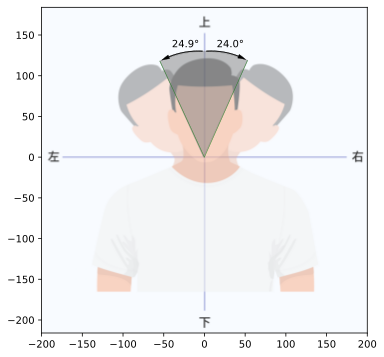

In [14]:
im_xy = plt.imread('src_fig/head-1@2x.png')
angle_roll_left = round(head_data['angle_roll'].max(), 1)
angle_roll_right = round(head_data['angle_roll'].min(), 1)
print(angle_roll_left, angle_roll_right)
'''
算坐标
'''
r = 130
x1, y1 = r*math.sin(angle_roll_left / 180 * math.pi), r*math.cos(angle_roll_left / 180 * math.pi)
x2, y2 = r*math.sin(angle_roll_right / 180 * math.pi), r*math.cos(angle_roll_right / 180 * math.pi)

'''
画圆弧
'''
style = "Simple, tail_width=0.7, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k", lw=0.3)
arc1 = patches.FancyArrowPatch((0, r), (x1, y1),connectionstyle="arc3,rad=-0.15", **kw)
arc2 = patches.FancyArrowPatch((0, r), (x2, y2),connectionstyle="arc3,rad=0.15", **kw)
'''
圆弧函数，准备阴影
'''
x = np.arange(x2, x1, 0.01)
func_arc = (r**2 - x**2)**0.5
func1 = np.linspace((0, 0), (x1, y1), x.shape[0] // 2)
# func1 = np.linspace((0, x1), (0, y1), x.shape[0])[:, 1]
func2 = np.linspace((x2, y2), (0, 0), x.shape[0] - x.shape[0] // 2)
# func2 = np.linspace((0, 0), (x2, y2), x.shape[0])[:, 1]
func = np.concatenate((func2, func1), axis=0)[:, 1]

with plt.rc_context({'figure.figsize': (6, 6)}):
    plt.imshow(im_xy, extent=[-200, 200, -216, 184])
    plt.plot([0, x1], [0, y1], 'g', lw=0.5, alpha=0.7)
    plt.plot([0, x2], [0, y2], 'g', lw=0.5, alpha=0.7)
    # plt.plot(x, func, 'g', lw=0.5, alpha=0.7)
    plt.gca().add_patch(arc1)
    plt.gca().add_patch(arc2)
    plt.fill_between(x, func, func_arc, color='grey', alpha=0.5)
    plt.text(
        x=15, y=r+5,
        # s='{}°'.format(angle_roll_left), rotation=-angle_roll_left / 2,
        s='{}°'.format(angle_roll_left),
        size=10
    )
    plt.text(
        x=-40, y=r+5,
        # s='{}°'.format(abs(angle_roll_right)), rotation=-angle_roll_right / 2,
        s='{}°'.format(abs(angle_roll_right)),
        size=10
    )
    plt.savefig('head_front.svg', bbox_inches='tight')


## right

46.3 -64.2


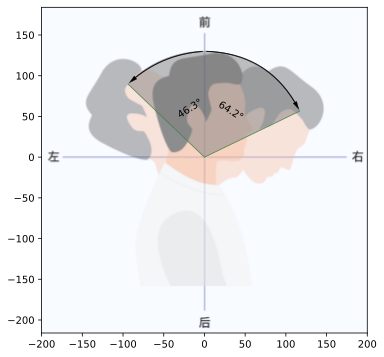

In [17]:
im_yz = plt.imread('src_fig/head-2@2x.png')
angle_pitch_back = round(head_data['angle_pitch'].max(), 1)
angle_pitch_front = round(head_data['angle_pitch'].min(), 1)
print(angle_pitch_back, angle_pitch_front)
'''
算坐标
'''
r = 130
x1, y1 = r*math.sin(-angle_pitch_front / 180 * math.pi), r*math.cos(-angle_pitch_front / 180 * math.pi)
x2, y2 = r*math.sin(-angle_pitch_back / 180 * math.pi), r*math.cos(-angle_pitch_back / 180 * math.pi)

'''
画圆弧
'''
style = "Simple, tail_width=0.7, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k", lw=0.3)
arc1 = patches.FancyArrowPatch((0, r), (x1, y1),connectionstyle="arc3,rad=-0.3", **kw)
arc2 = patches.FancyArrowPatch((0, r), (x2, y2),connectionstyle="arc3,rad=0.18", **kw)
'''
圆弧函数，准备阴影
'''
# x 两段长度 要跟 func1、2对得上
x = np.arange(x2, x1, 0.01)
func_arc = (r**2 - x**2)**0.5
# func1 = np.arange(0, y1, 0.01)
func1 = np.linspace((0, 0), (x1, y1), x.shape[0] - np.where(abs(x) < 0.01)[0][0])
# func2 = np.arange(y2, 0, 0.01)
func2 = np.linspace((x2, y2), (0, 0), np.where(abs(x) < 0.01)[0][0])
func = np.concatenate((func2, func1), axis=0)[:, 1]

with plt.rc_context({'figure.figsize': (6, 6)}):
    plt.imshow(im_yz, extent=[-200, 200, -216, 184])
    plt.plot([0, x1], [0, y1], 'g', lw=0.5, alpha=0.7)
    plt.plot([0, x2], [0, y2], 'g', lw=0.5, alpha=0.7)
    # plt.plot([0.05, 0], marker='v')
    # plt.plot(x, func, 'g', lw=0.5, alpha=0.7)
    plt.gca().add_patch(arc1)
    plt.gca().add_patch(arc2)
    plt.fill_between(x, func, func_arc, color='grey', alpha=0.5)
    plt.text(
        x=15, y=45,
        s='{}°'.format(abs(angle_pitch_front)), rotation=angle_pitch_front / 2,
        size=10
    )
    plt.text(
        x=-35, y=48,
        s='{}°'.format(abs(angle_pitch_back)), rotation=-angle_pitch_front / 2,
        size=10
    )
    plt.savefig('head_right.svg', bbox_inches='tight')

## top

38.5 -39.8


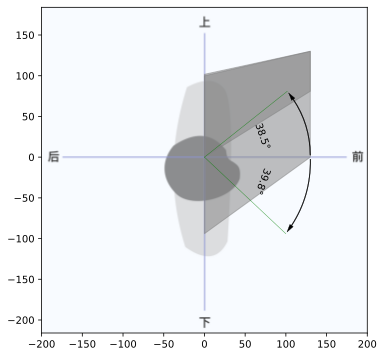

In [53]:
im_yz = plt.imread('src_fig/组 21@2x.png')
angle_yaw_left = round(head_data['angle_yaw'].max(), 1)
angle_yaw_right = round(head_data['angle_yaw'].min(), 1)
print(angle_yaw_left, angle_yaw_right)
'''
算坐标
'''
r = 130
x1, y1 = r*math.cos(angle_yaw_left / 180 * math.pi), r*math.sin(angle_yaw_left / 180 * math.pi)
x2, y2 = r*math.cos(-angle_yaw_right / 180 * math.pi), r*math.sin(-angle_pitch_back / 180 * math.pi)

'''
画圆弧
'''
style = "Simple, tail_width=0.7, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k", lw=0.3)
arc1 = patches.FancyArrowPatch((r, 0), (x1, y1),connectionstyle="arc3,rad=0.18", **kw)
arc2 = patches.FancyArrowPatch((r, 0), (x2, y2),connectionstyle="arc3,rad=-0.18", **kw)
'''
圆弧函数，准备阴影
'''
# x 两段长度 要跟 func1、2对得上
y_uparc = np.arange(x1, r, 0.01)
y_downarc = np.arange(x2, r, 0.01)
func_uparc = (r**2 - y_uparc**2)**0.5
func_downarc = (r**2 - y_downarc**2)**0.5
x1_arc = np.linspace(0, r, num=func_uparc.shape[0])
x2_arc = np.linspace(0, r, num=func_downarc.shape[0])
# func1 = np.arange(0, y1, 0.01)
func1 = np.linspace((0, 0), (x1, y1), y_uparc.shape[0])[:, 1]
# func2 = np.arange(y2, 0, 0.01)
func2 = np.linspace((x2, y2), (0, 0), y_downarc.shape[0])[:, 1]
# func = np.concatenate((func2, func1), axis=0)[:, 1]

with plt.rc_context({'figure.figsize': (6, 6)}):
    plt.imshow(im_yz, extent=[-200, 200, -216, 184])
    plt.plot([0, x1], [0, y1], 'g', lw=0.5, alpha=0.7)
    plt.plot([0, x2], [0, y2], 'g', lw=0.5, alpha=0.7)
    # plt.plot([0.05, 0], marker='v')
    # plt.plot(x, func, 'g', lw=0.5, alpha=0.7)
    plt.gca().add_patch(arc1)
    plt.gca().add_patch(arc2)
    plt.fill_between(x1_arc, func1, y_uparc, color='grey', alpha=0.5)
    plt.fill_between(x2_arc, func2, y_downarc, color='grey', alpha=0.5)
    plt.text(
        x=60, y=10,
        s='{}°'.format(abs(angle_yaw_left)), rotation= -(90 - angle_yaw_left / 2),
        size=10
    )
    plt.text(
        x=60, y=-45,
        s='{}°'.format(abs(angle_yaw_right)), rotation=angle_yaw_right / 2 - 90,
        size=10
    )
    # plt.savefig('head_right.svg', bbox_inches='tight')

In [52]:
y_uparc.shape

(2827,)